## Salary Prediction Model

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the dataset


In [2]:
df=pd.read_csv("/kaggle/input/salary-prediction/Salary Prediction of Data Professions.csv")

### Exploratory Data Analysis (EDA)

#### Display the first few rows of the dataset

In [3]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
df.sample(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
448,SHARRON,ANTHES,F,7-17-2014,01-07-2016,Analyst,24.0,46988,Operations,18.0,12.0,5.0,2
413,MATHEW,ACERET,M,09-12-2014,01-07-2016,Analyst,24.0,42440,IT,20.0,10.0,4.0,2
518,BRICE,ALESSANDRO,M,7-23-2014,01-07-2016,Analyst,25.0,46556,Web,19.0,11.0,4.0,3
328,ROMAN,AFFELT,M,12-20-2014,01-07-2016,Analyst,22.0,46812,Operations,28.0,2.0,4.0,0
1296,HOUSTON,ALAI,M,5-23-2013,01-07-2016,Analyst,22.0,45062,Web,20.0,10.0,4.0,0


#### This step loads the dataset and displays the first few rows to give an initial understanding of the data structure.

#### Understanding the datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [6]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [7]:
df['LEAVES REMAINING'].unique()

array([ 6., 13.,  7.,  8.,  3., 10., 11.,  1., 15.,  0., nan,  9., 12.,
        2.,  5., 14.,  4.])

In [8]:
df['RATINGS'].unique()

array([ 2., nan,  3.,  4.,  5.])

In [9]:
df['LEAVES USED'].unique()

array([24., nan, 23., 22., 27., 20., 19., 29., 15., 30., 16., 21., 28.,
       17., 25., 26., 18.])

In [10]:
df['AGE'].unique()

array([21., nan, 22., 28., 24., 36., 25., 23., 26., 29., 39., 32., 31.,
       38., 27., 33., 35., 41., 42., 43., 34., 30., 45., 40., 37., 44.])

In [11]:
df['CURRENT DATE'].unique()

array(['01-07-2016'], dtype=object)

Observation of Checking the Data Types of Each Column and Unique Values of Float and Datetime Data:

1. The columns ('LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'AGE') do not contain any float values but their data type is float. Therefore, they should be changed to int. These columns have NaN values, which is the main reason for the float data type. The steps for changing the data type are to first replace or remove the NaN values, and then change the data type.
2. The columns ('CURRENT DATE', 'DOJ') contain datetime data but their data type is string. Therefore, they should be changed to datetime objects.

#### Display summary statistics

In [12]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


#### Summary statistics provide insights into the central tendency, dispersion, and shape of the dataset's distribution.

#### Check for missing values

In [13]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

<Axes: >

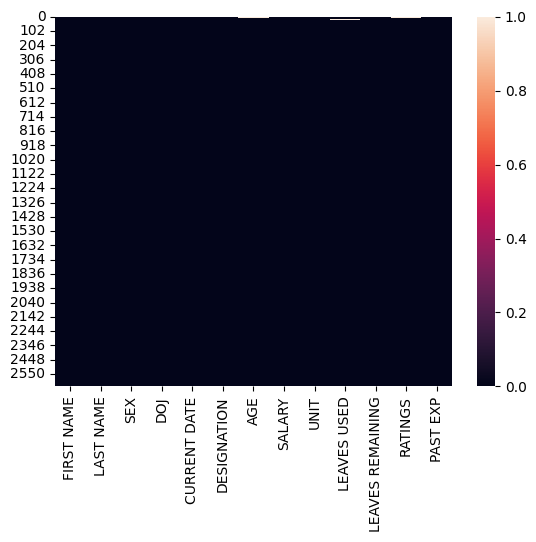

In [14]:
sns.heatmap(df.isnull())

1. put '0' in LEAVES USED LEAVES REMAINING
2. put 'mean' in AGE and RATING 
3. Remove nan in DOJ col
4. or Simple Option just remove all nan because only 8 nan are present


#### This code checks for any missing values in the dataset, which is crucial for data preprocessing.

### Outlier Detection

In [15]:
columns_to_plot=df.columns

<Axes: >

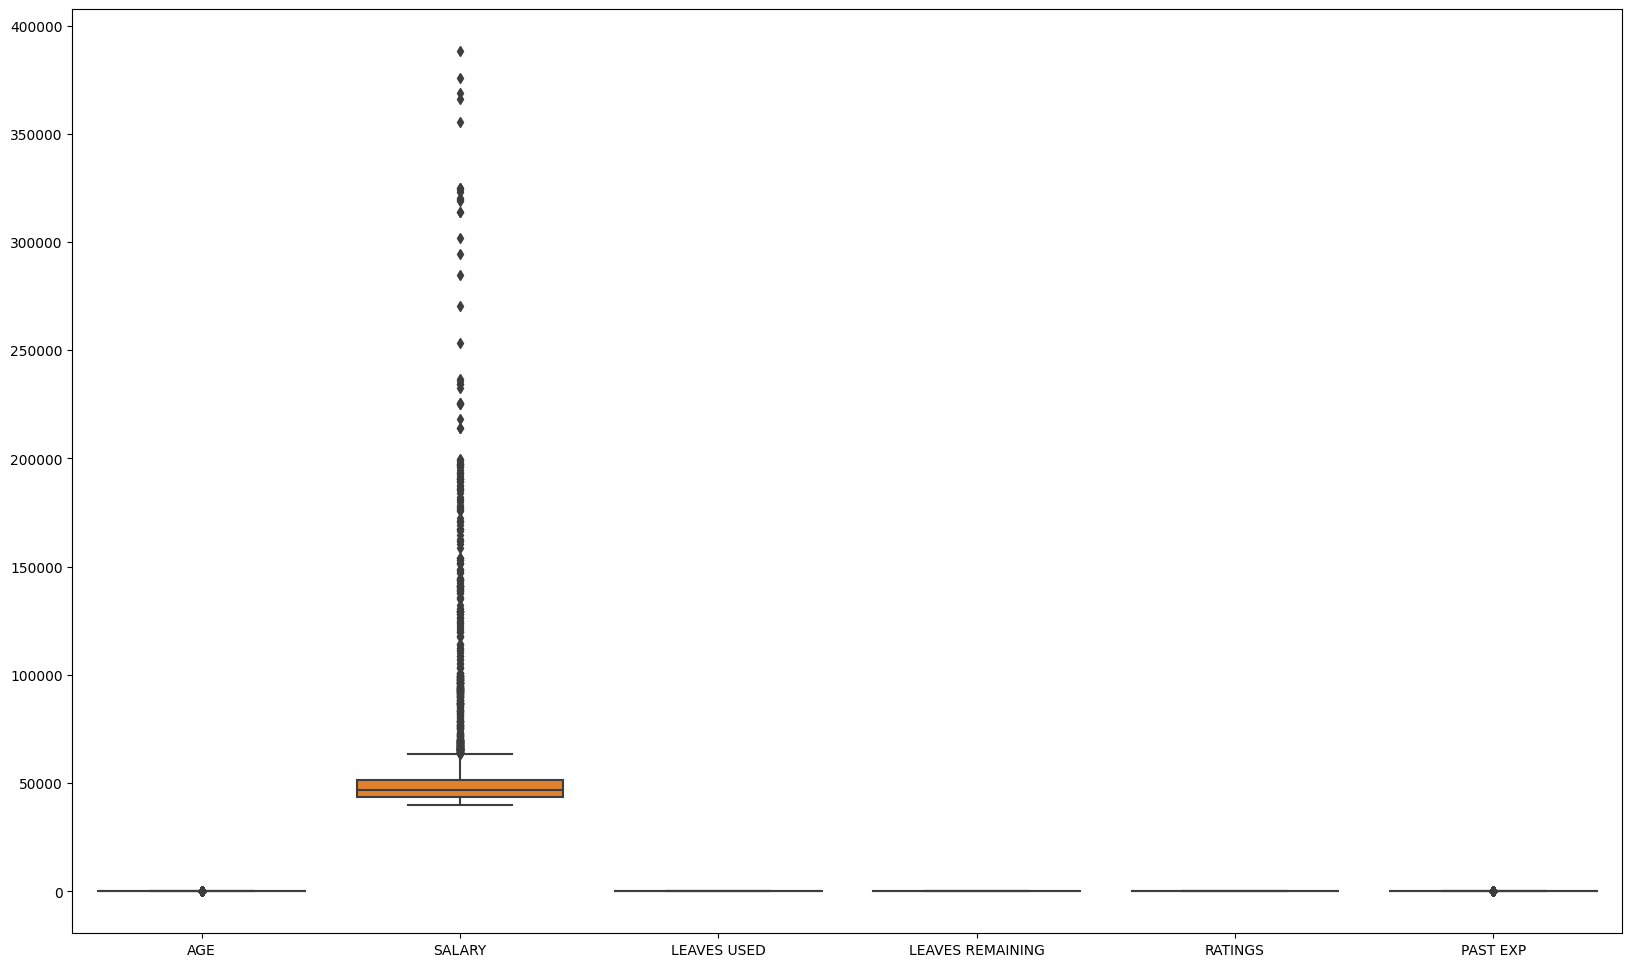

In [16]:
plt.figure(figsize=(20,12))
sns.boxplot(df)

In [17]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

### Cross validation of Outlier are genuine or not

<Axes: xlabel='AGE', ylabel='SALARY'>

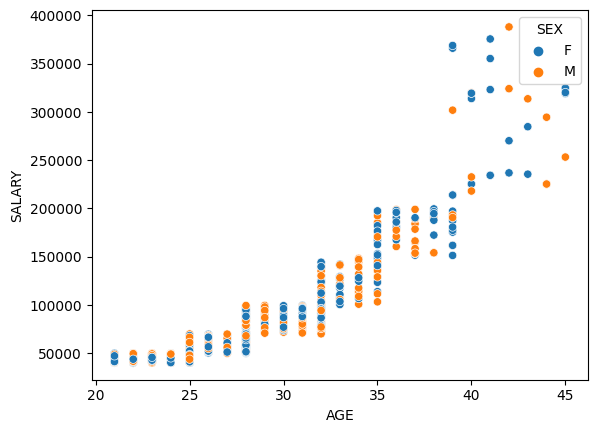

In [18]:
sns.scatterplot(data=df,y='SALARY',x='AGE',hue='SEX')

<Axes: xlabel='SALARY', ylabel='RATINGS'>

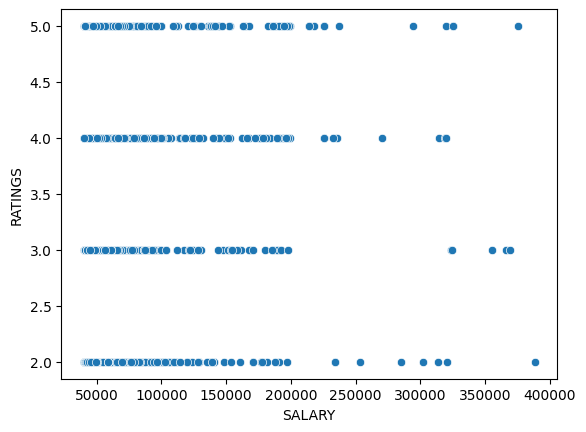

In [19]:
sns.scatterplot(data=df,x='SALARY',y='RATINGS')

In [20]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

### Droping Name Colum

In [21]:
df = df.drop('FIRST NAME', axis=1)
df = df.drop('LAST NAME', axis=1)

In [22]:
df.head(1)

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0


### Directly Remove NaN Value

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

### Typecasting of Datatype

In [25]:
df['LEAVES USED'] = df['LEAVES USED'].astype(int)
df['LEAVES REMAINING'] = df['LEAVES REMAINING'].astype(int)
df['RATINGS'] = df['RATINGS'].astype(int)
df['AGE'] = df['AGE'].astype(int)
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

### Creating new feature

In [26]:
df['YEAR OF EXPERIENCE']=(df['CURRENT DATE']-df['DOJ']).dt.days//365

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 0 to 2638
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SEX                 2632 non-null   object        
 1   DOJ                 2632 non-null   datetime64[ns]
 2   CURRENT DATE        2632 non-null   datetime64[ns]
 3   DESIGNATION         2632 non-null   object        
 4   AGE                 2632 non-null   int64         
 5   SALARY              2632 non-null   int64         
 6   UNIT                2632 non-null   object        
 7   LEAVES USED         2632 non-null   int64         
 8   LEAVES REMAINING    2632 non-null   int64         
 9   RATINGS             2632 non-null   int64         
 10  PAST EXP            2632 non-null   int64         
 11  YEAR OF EXPERIENCE  2632 non-null   int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 267.3+ KB


In [28]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YEAR OF EXPERIENCE
0,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2,0,1
2,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3,0,1
3,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3,0,2
5,F,2013-02-19,2016-01-07,Analyst,22,48736,Marketing,20,10,4,0,2
6,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5,0,2


### Retrieving some insight from dataset

<Axes: xlabel='DOJ', ylabel='SALARY'>

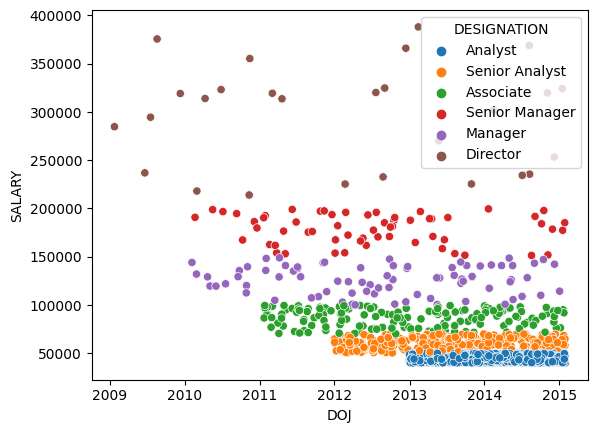

In [29]:
sns.scatterplot(data=df,x='DOJ',y='SALARY',hue='DESIGNATION')

<Axes: xlabel='DOJ', ylabel='SALARY'>

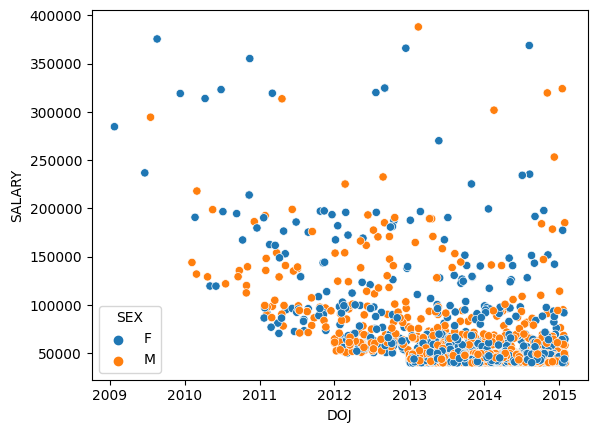

In [30]:
sns.scatterplot(data=df,x='DOJ',y='SALARY',hue='SEX')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 0 to 2638
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SEX                 2632 non-null   object        
 1   DOJ                 2632 non-null   datetime64[ns]
 2   CURRENT DATE        2632 non-null   datetime64[ns]
 3   DESIGNATION         2632 non-null   object        
 4   AGE                 2632 non-null   int64         
 5   SALARY              2632 non-null   int64         
 6   UNIT                2632 non-null   object        
 7   LEAVES USED         2632 non-null   int64         
 8   LEAVES REMAINING    2632 non-null   int64         
 9   RATINGS             2632 non-null   int64         
 10  PAST EXP            2632 non-null   int64         
 11  YEAR OF EXPERIENCE  2632 non-null   int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 267.3+ KB


### Distribution Analysis

In [32]:
columns_to_plot=df.select_dtypes(include=['number']).columns.tolist()

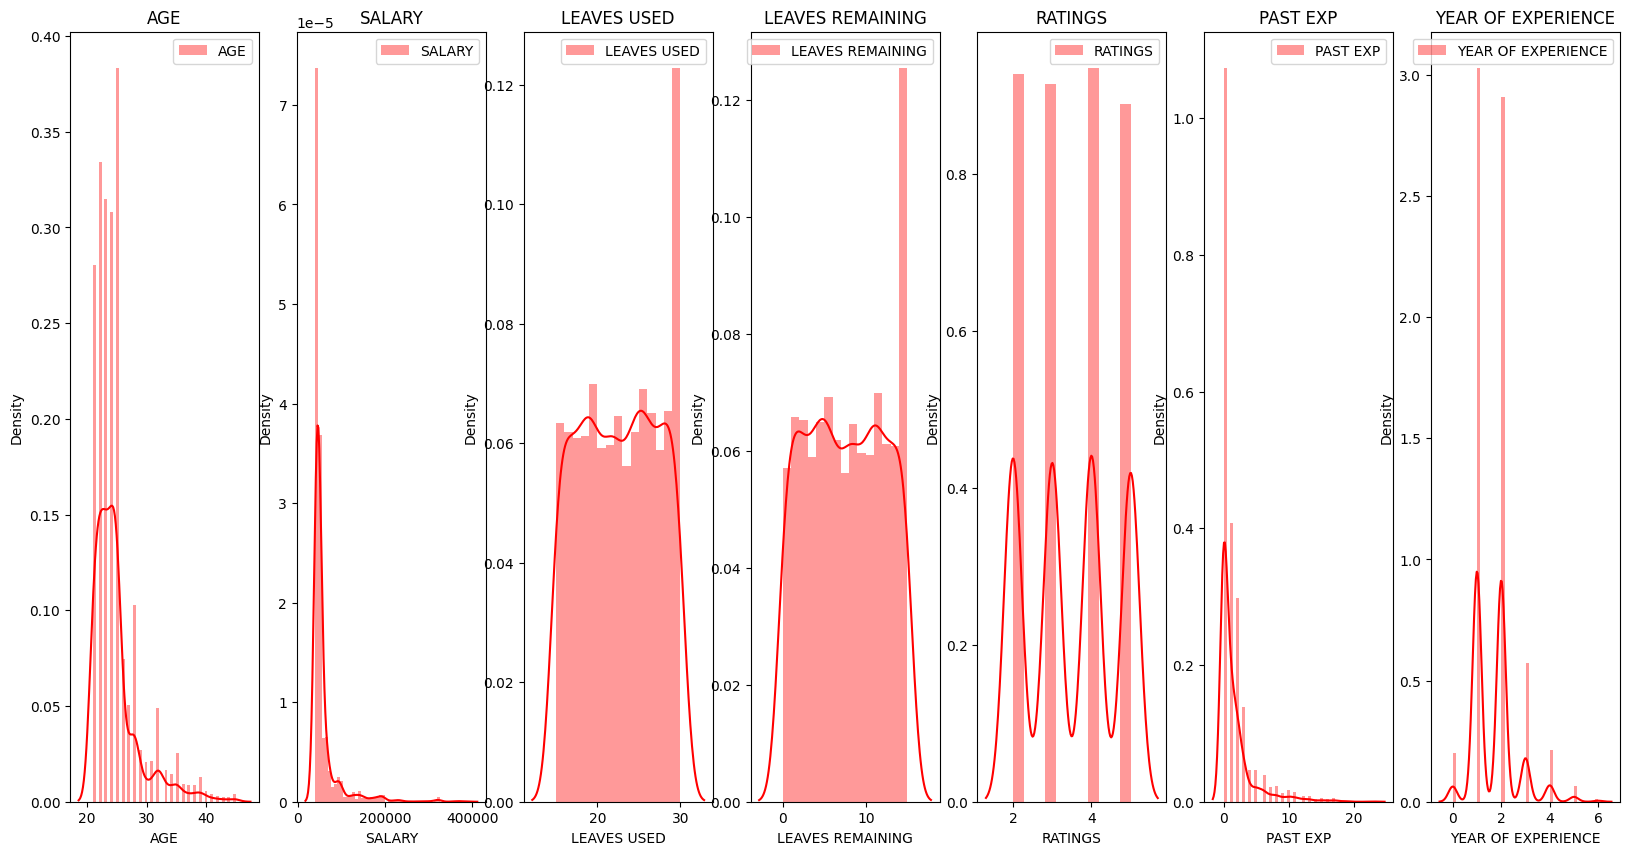

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 10))
for idx, col in enumerate(columns_to_plot):
    sns.distplot(df[col], kde=True, label=col, color='red', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].legend()

Leaves used and Leaves Remaining are oposite to each other so , select only one.

In [34]:
columns_to_plot=df.select_dtypes(include=['object']).columns.tolist()

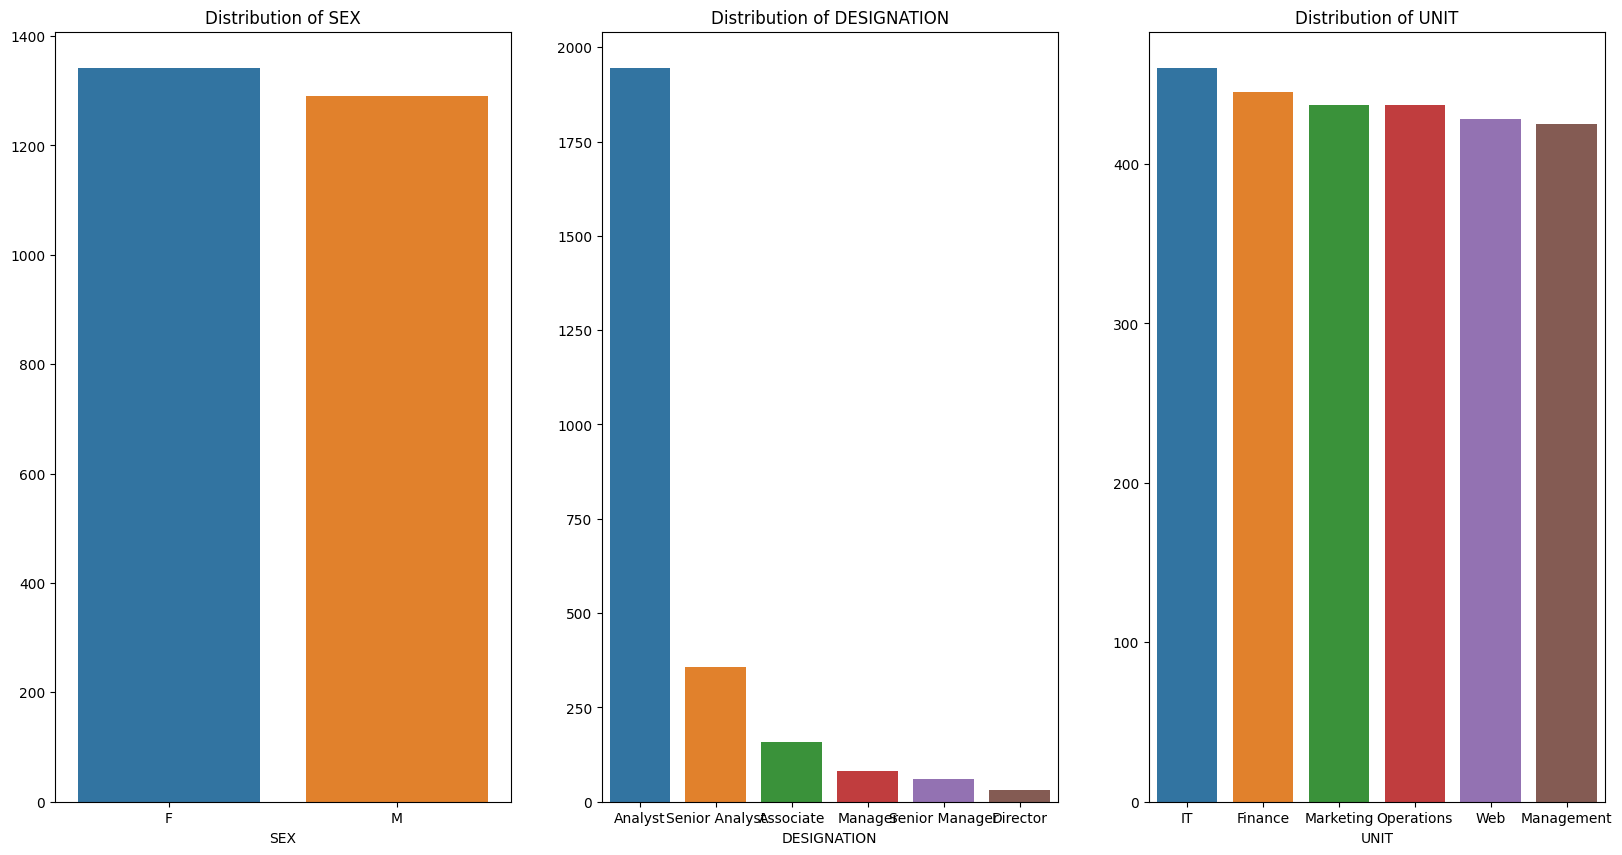

In [35]:
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 10))
for idx, col in enumerate(columns_to_plot):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

In [36]:
df.columns

Index(['SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT',
       'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'YEAR OF EXPERIENCE'],
      dtype='object')

### Removing Extra Feature

In [37]:
df = df.drop('DOJ', axis=1)
df = df.drop('CURRENT DATE', axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 0 to 2638
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SEX                 2632 non-null   object
 1   DESIGNATION         2632 non-null   object
 2   AGE                 2632 non-null   int64 
 3   SALARY              2632 non-null   int64 
 4   UNIT                2632 non-null   object
 5   LEAVES USED         2632 non-null   int64 
 6   LEAVES REMAINING    2632 non-null   int64 
 7   RATINGS             2632 non-null   int64 
 8   PAST EXP            2632 non-null   int64 
 9   YEAR OF EXPERIENCE  2632 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 226.2+ KB


In [39]:
columns_to_plot=df.select_dtypes(include=['number']).columns.tolist()

### Correlation Analysis for Feature Selection

<Axes: >

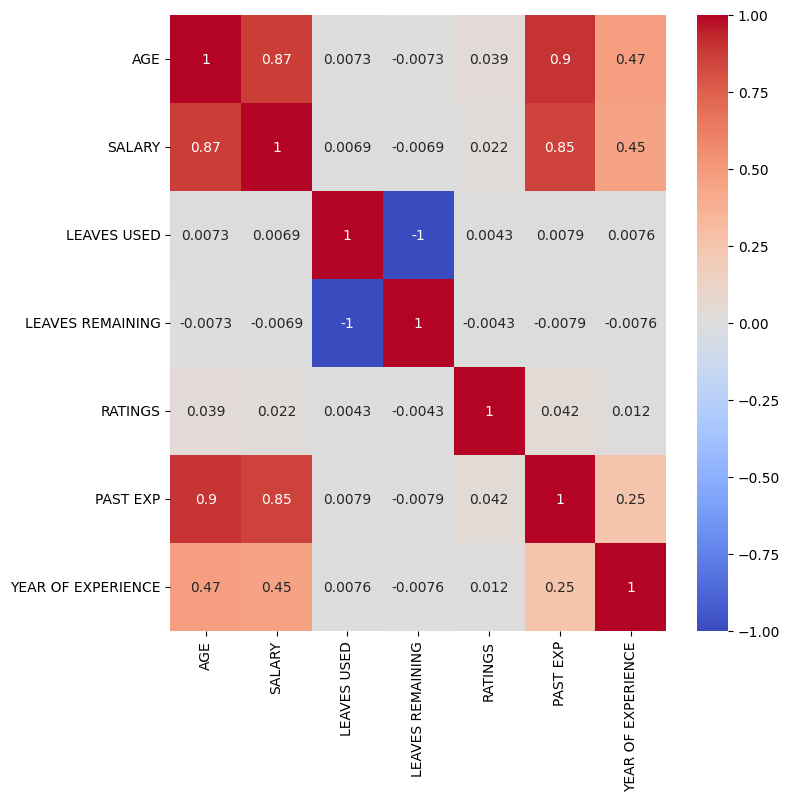

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(df[columns_to_plot].corr(),annot=True,cmap='coolwarm')

### Here, the dataset is split into features (X) and the target variable (y). The target variable is 'SALARY'.

In [41]:
X=df.drop('SALARY' ,axis=1)
y=df['SALARY']

In [42]:
X.columns

Index(['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING',
       'RATINGS', 'PAST EXP', 'YEAR OF EXPERIENCE'],
      dtype='object')

### Removeing Low correlated colum to a target colum

In [43]:
X=X.drop('LEAVES USED',axis=1)
# X=X.drop('RATINGS',axis=1)

In [44]:
X.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES REMAINING,RATINGS,PAST EXP,YEAR OF EXPERIENCE
0,F,Analyst,21,Finance,6,2,0,1
2,F,Analyst,21,Finance,7,3,0,1
3,F,Analyst,22,IT,8,3,0,2
5,F,Analyst,22,Marketing,10,4,0,2
6,M,Analyst,22,Marketing,11,5,0,2


In [45]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

### Create a model list

In [46]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Extra Trees', ExtraTreesRegressor())
]

### Use Column Transformer for OneHotEncoding and StandardScaler

#### Preprocessing pipelines are set up for categorical (one-hot encoding) and numerical data (standard scaling).

In [47]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

### Create a training and test data
#### The data is split into training and testing sets, with 20% of the data reserved for testing.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating a Pipeline

In [49]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"{model_name} evaluation:")
    print(f"Training set -> MAE: {train_mae}, MSE: {train_mse}, R2: {train_r2}")
    print(f"Test set -> MAE: {test_mae}, MSE: {test_mse}, R2: {test_r2}\n")

In [50]:
for model_name,model in models:
    evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

Linear Regression evaluation:
Training set -> MAE: 4229.251772086152, MSE: 62587025.57517189, R2: 0.9512828133493768
Test set -> MAE: 4313.619139084211, MSE: 63686401.27365988, R2: 0.9614112002723234

Ridge Regression evaluation:
Training set -> MAE: 4624.415275769423, MSE: 68333614.4552541, R2: 0.946809719437299
Test set -> MAE: 4938.413848302696, MSE: 75440764.96421102, R2: 0.9542890081353884

Lasso Regression evaluation:
Training set -> MAE: 4228.606977902346, MSE: 62588818.12964815, R2: 0.9512814180408412
Test set -> MAE: 4319.481465415495, MSE: 63741421.42879669, R2: 0.9613778625156737

ElasticNet Regression evaluation:
Training set -> MAE: 9680.685080605097, MSE: 290689985.2120055, R2: 0.7737294888693665
Test set -> MAE: 10595.410970463148, MSE: 388663737.653983, R2: 0.7645012619052973

Decision Tree evaluation:
Training set -> MAE: 178.91718131433095, MSE: 536356.3039984165, R2: 0.9995825050011085
Test set -> MAE: 5009.9952561669825, MSE: 103177619.39611006, R2: 0.93748272140316

#### A pipeline is created that first preprocesses the data and then fits it to an ExtraTreesRegressor model.

In [51]:
pipeline_et = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', ExtraTreesRegressor())
    ])

In [52]:
pipeline_et.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SEX', 'DESIGNATION',
                                                   'UNIT']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'LEAVES REMAINING',
                                                   'RATINGS', 'PAST EXP',
                                                   'YEAR OF EXPERIENCE'])])),
                ('model', ExtraTreesRegressor())])

In [53]:
# Make predictions
y_train_pred = pipeline_et.predict(X_train)
y_test_pred = pipeline_et.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R-squared (R²): {train_r2}")

print("\nTest set evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R-squared (R²): {test_r2}")

Training set evaluation:
Mean Absolute Error (MAE): 178.917181314331
Mean Squared Error (MSE): 536356.3039984164
R-squared (R²): 0.9995825050011085

Test set evaluation:
Mean Absolute Error (MAE): 4149.800610373182
Mean Squared Error (MSE): 71157483.51005876
R-squared (R²): 0.9568843296939314


#### A parameter grid is defined for hyperparameter tuning using GridSearchCV.

In [54]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['auto', 'sqrt'],
    'model__bootstrap': [True,False]
}

#### Predictions are made on the test set using the best model found by GridSearchCV.

In [55]:
grid_search = GridSearchCV(estimator=pipeline_et, param_grid=param_grid, cv=5, scoring='r2')

In [56]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['SEX',
                                                                          'DESIGNATION',
                                                                          'UNIT']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['AGE',
                                                                          'LEAVES '
                                                                          'REMAINING',
                                                                          'RATINGS',
                                                                          'PAST '
                                                                          'EXP',
                                                                          'YEAR '
                                                                          'OF '
                                                                          'EXPERIENCE'])])),
                                       ('model', ExtraTreesRegressor())]),
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 5, 10],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='r2')

In [57]:
grid_search.best_params_

{'model__bootstrap': True,
 'model__max_depth': 10,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

In [58]:
best_model = grid_search.best_estimator_

In [59]:
# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R-squared (R²): {train_r2}")

print("\nTest set evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R-squared (R²): {test_r2}")

Training set evaluation:
Mean Absolute Error (MAE): 3181.2325275565736
Mean Squared Error (MSE): 20233311.98724365
R-squared (R²): 0.9842505690662847

Test set evaluation:
Mean Absolute Error (MAE): 4262.727646491625
Mean Squared Error (MSE): 62241560.936106205
R-squared (R²): 0.9622866564656284


#### Test case testing function:

In [60]:
def preprocess_user_input(user_input):
    user_df = pd.DataFrame([user_input])
    return user_df

In [61]:
def predict_salary(user_input):
    user_processed = preprocess_user_input(user_input)
    predicted_salary = pipeline_et.predict(user_processed)

    return predicted_salary

#### A random sample from the dataset is displayed to demonstrate prediction on new data.

In [62]:
df.loc[1731]

SEX                         F
DESIGNATION           Manager
AGE                        34
SALARY                 124680
UNIT                  Finance
LEAVES USED                15
LEAVES REMAINING           15
RATINGS                     4
PAST EXP                    8
YEAR OF EXPERIENCE          2
Name: 1731, dtype: object

In [63]:
user_input = {
    'SEX': 'F',
    'DESIGNATION': 'Manager',
    'AGE': 34,
    'UNIT': 'Finance',
    'LEAVES REMAINING': 15,
    'PAST EXP': 2,
    'YEAR OF EXPERIENCE': 8,
    'RATINGS':4
}
predicted_salary = int(predict_salary(user_input)[0])
predicted_salary 

124010

In [64]:
df.loc[903]

SEX                         F
DESIGNATION           Analyst
AGE                        22
SALARY                  43569
UNIT                  Finance
LEAVES USED                27
LEAVES REMAINING            3
RATINGS                     2
PAST EXP                    0
YEAR OF EXPERIENCE          1
Name: 903, dtype: object

In [65]:
user_input = {
    'SEX': 'F',
    'DESIGNATION': 'Analyst',
    'AGE': 22,
    'UNIT': 'Finance',
    'LEAVES REMAINING': 3,
    'PAST EXP': 1,
    'YEAR OF EXPERIENCE': 0,
    'RATINGS':2
}
predicted_salary = int(predict_salary(user_input)[0])
predicted_salary 

43805

In [66]:
df.sample()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YEAR OF EXPERIENCE
898,F,Analyst,22,46078,Operations,15,15,3,0,2


In [67]:
user_input = {
    'SEX': 'F',
    'DESIGNATION': 'Senior Analyst',
    'AGE': 27,
    'UNIT': 'Marketing',
    'LEAVES REMAINING': 14,
    'PAST EXP': 3,
    'YEAR OF EXPERIENCE': 2,
    'RATINGS':4
}
predicted_salary = int(predict_salary(user_input)[0])
predicted_salary 

69643

#### The trained model is saved to a file for later use.

In [68]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline_et, file)